# Welcome to Advanced Software Engineering
## Analyzing Version Control System Data

![](https://comidoc.net/static/assets/thumbs/480/webp/2267906_505c.webp)

## Learning Objectives

After this session (+ exercises) the student will be able to:

  * Understand how research analyzing VCS histories collects the underlying data.
  * Export the history from Git repositories.
  * Apply scripts and programs in various languages to clean and pre-process the exported data.
  * Apply scripts and programs in various languages to analyze Git VCS data with respect to certain hypotheses/research questions.
  * Interpret the analysis results to either better understand current practices or to suggest actionable changes of current practices in software engineering teams.
  
-------------------------------------

# What are we doing today?

## Motivation

You all read the paper C. Bird et al. [_"Don't Touch My Code! Examining the Effects of Ownership on Software Quality"_]( https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/bird2011dtm.pdf)

In [3]:
from IPython.display import IFrame


IFrame('./bird2011dtm.pdf', width='100%', height=800)

### What did you take away from the paper?


  * 
  * 
  



### Some paragraphs that I think are important...

  > "How much does ownership affect quality?"
    
  > Ownership is a general term used to describe whether one person has responsibility for a software component, or if there is no one clearly responsible developer. Within Microsoft, we have found that when more people work on a binary, it has more failures.
  
  > Interestingly, unlike some aspects of software which are known to be related to defects such as dependency complexity, or size, ownership is something that can be deliberately changed by modifying processes and policies. Thus, the answer to the question: “How much does ownership affect quality?” is important as it is actionable. Managers and team leads can make better decisions about how to govern a project by knowing the answer. 
  
   




  > We require several types of data. The most important data are the commit histories and software failures. Software repositories record the contents of every change made to a piece of software, along with the change author, the time of change, and an associated log message that may be indicative of the type of change (e.g. introducing a feature, or fixing a bug). We collected the number of changes made by each developer to each source file and used a mapping of source files to binaries in order to determine the number of changes made by each developer to each binary. Although the source code management system uses branches heavily, we only recorded changes from developers that were edits to the source code. Branching operations (e.g. branching and merging) were not counted as changes.

### After reading the paper, do you know how the researchers collected the data on which they base their analysis?

The big issue is now:
<p style="padding:6px; color: grey; background-color: white; border: orange 2px solid">"Alright, I can read the article and understand the experiment setup and results, but how would I run a similar experiment in my organization?"</p>

# What are we doing today?

## What are we really doing now?

We will -on a running example- perform a set of analyses of data from Git, a particular version control system (VCS). Everything in this lecture should be -with minor adaptations- applicable to other VCS, such as Mercurial, Microsoft TFS, etc.

You will learn how to:

  * Export the history from Git repositories.
  * Apply scripts and programs in various languages to clean and pre-process the exported data.
  * Apply scripts and programs in various languages to analyze Git VCS data with respect to certain hypotheses/research questions.
  * Interpret the analysis results to either better understand current practices or to suggest actionable changes of current practices in software engineering teams.
  
## Working together now

As you have various operating systems installed on your computers and since I cannot support all of these in such a short time, we will work together on a remotely hosted virtual machine Linux environment.

Navigate to: https://github.com/HelgeCPH/2019_ase_behavioural_analysis and press the button that says `launch binder`. In case you have a Linux or Unix installed on your computer you can run everything on your local machine right away.

After waiting a short while click on the file called `Lecture notes.ipynb` now you should see a similar screen to mine.

--------------------------------------------------------


# Getting the VCS Data

In the lecture we use [Apache Airflow](https://airflow.apache.org) as an example software system.

  > Airflow is a platform to programmatically author, schedule and monitor workflows.

The project is accessible on Github: https://github.com/apache/airflow. That is, we make use of the Git VCS during this lecture.

In [58]:
%%bash
git clone https://github.com/apache/airflow.git

Cloning into 'airflow'...
Checking out files: 100% (3298/3298), done.


In [59]:
%%bash
ls -ltrha airflow/

total 2240
drwxr-xr-x  22 ropf  staff   704B Sep 26 21:09 ..
-rw-r--r--   1 ropf  staff   1.4K Sep 26 21:10 .asf.yaml
-rwxr-xr-x   1 ropf  staff   908B Sep 26 21:10 .bash_completion
-rw-r--r--   1 ropf  staff   963B Sep 26 21:10 .coveragerc
-rw-r--r--   1 ropf  staff   2.8K Sep 26 21:10 .dockerignore
-rw-r--r--   1 ropf  staff   1.1K Sep 26 21:10 .editorconfig
-rw-r--r--   1 ropf  staff   364B Sep 26 21:10 .flake8
drwxr-xr-x   9 ropf  staff   288B Sep 26 21:10 .github
-rw-r--r--   1 ropf  staff   2.5K Sep 26 21:10 .gitignore
-rw-r--r--   1 ropf  staff   842B Sep 26 21:10 .hadolint.yaml
-rw-r--r--   1 ropf  staff   5.3K Sep 26 21:10 .mailmap
-rw-r--r--   1 ropf  staff    16K Sep 26 21:10 .pre-commit-config.yaml
-rw-r--r--   1 ropf  staff   1.5K Sep 26 21:10 .rat-excludes
-rw-r--r--   1 ropf  staff   966B Sep 26 21:10 .readthedocs.yml
-rw-r--r--   1 ropf  staff    90K Sep 26 21:10 BREEZE.rst
-rw-r--r--   1 ropf  staff   232K Sep 26 21:10 CHANGELOG.txt
-rw-r--r--   1 ropf  staff    62K Se

## Moving back in time 

We want to all work on the same "view" of the software so let's go back to the state of the repository on Monday Sept. 21rd.

In [141]:
%%bash
cd airflow
git checkout $(git rev-list -n 1 --before="2020-09-21" master)

Previous HEAD position was 0161b5ea2 Increasing type coverage for multiple provider (#11159)
HEAD is now at 3db4d3b04 All versions in CI yamls are not hard-coded any more (#10959)


If you want to perform an analyzes for a certain period only, you can add the `--after` switch too.

## The revisions of a software system, organizational history

```bash
git log
```

Note, you have to switch into the directory of the repository that you want to study.

In [142]:
%%bash
cd airflow/
git log | head -30

commit 3db4d3b04da051ae50ee272f4b106d6ff8e9f738
Author: Jarek Potiuk <jarek.potiuk@polidea.com>
Date:   Mon Sep 21 20:02:04 2020 +0200

    All versions in CI yamls are not hard-coded any more (#10959)
    
    GitHub Actions allow to use `fromJson` method to read arrays
    or even more complex json objects into the CI workflow yaml files.
    
    This, connected with set::output commands, allows to read the
    list of allowed versions as well as default ones from the
    environment variables configured in
    ./scripts/ci/libraries/initialization.sh
    
    This means that we can have one plece in which versions are
    configured. We also need to do it in "breeze-complete" as this is
    a standalone script that should not source anything we added
    BATS tests to verify if the versions in breeze-complete
    correspond with those defined in the initialization.sh
    
    Also we do not limit tests any more in regular PRs now - we run
    all combinations of available versions.

### What do we see and how to read it?

```
commit 0161b5ea2b805d62a0317e5cab6f797b92c8abf1
Author: Satyasheel <mlgruby@users.noreply.github.com>
Date:   Sat Sep 26 15:40:28 2020 +0100

    Increasing type coverage for multiple provider (#11159)

commit 08dfd8cd00dae2d7aad53018af04428d933b1ceb
Author: Satyasheel <mlgruby@users.noreply.github.com>
Date:   Fri Sep 25 21:08:26 2020 +0100

    Increase Type coverage for IMAP provider (#11154)

commit ee90807ace5d8b34ebd1f58ed4d9c831836d5a4d
Author: Ash Berlin-Taylor <ash_github@firemirror.com>
Date:   Fri Sep 25 20:49:11 2020 +0100

    Massively speed up the query returned by TI.filter_for_tis (#11147)
    
    The previous query generated SQL like this:
    
    
    WHERE (task_id = ? AND dag_id = ? AND execution_date = ?) OR (task_id = ? AND dag_id = ? AND execution_date = ?)
    
    Which is fine for one or maybe even 100 TIs, but when testing DAGs at
    extreme size (over 21k tasks!) this query was taking for ever (162s on
    Postgres, 172s on MySQL 5.7)
    
    By changing this query to this
```

Note, we are looking on the master branch only at the moment. That is, you see only commit messages on that single branch (we will talk more about these in three weeks).

```bash
git log --all
```

```bash
git log --branches --remotes --tags --graph --oneline --decorate
```


### What are all these switches?

You can read the help of `git log` via:

```bash
git help log
```

All the `git log`s we looked at so far are meant for humans to read and interpret.

However, we want to automatically analyze the logs to infer information out of it that is hidden in the logs.

---------------------------------------------

# Collecting, Cleansing, and Pre-processing the Data

## Exporting the `git log` into a machine readable format

Read the `PRETTY FORMATS` section of the `git log` help for possible placeholders in the format string

In [143]:
%%bash
cd airflow/
git log --all --pretty=format:'%s' > ../data/all_commit_msgs.txt

In [144]:
%%bash
head data/all_commit_msgs.txt

Increasing type coverage for multiple provider (#11159)
Increase Type coverage for IMAP provider (#11154)
Massively speed up the query returned by TI.filter_for_tis (#11147)
Add new member to Polidea (#11153)
Update to latest version of pbgouncer-exporter (#11150)
Make sure pgbouncer-exporter docker image is linux/amd64 (#11148)
Remove link to Dag Model view given the redundancy with DAG Details view (#11082)
Fix incorrect Usage of Optional[str] & Optional[int] (#11141)
Fix gitSync user in the helm Chart (#11127)
Fixes celery deployments for Airflow 2.0 (#11129)


In [145]:
%%bash
cd airflow/
git log --all --pretty=format:'"%h","%s"' > ../data/all_commit_msgs.csv

In [146]:
%%bash
head data/all_commit_msgs.csv

"0161b5ea2","Increasing type coverage for multiple provider (#11159)"
"08dfd8cd0","Increase Type coverage for IMAP provider (#11154)"
"ee90807ac","Massively speed up the query returned by TI.filter_for_tis (#11147)"
"b92c60af8","Add new member to Polidea (#11153)"
"c65d46634","Update to latest version of pbgouncer-exporter (#11150)"
"33fe9a52c","Make sure pgbouncer-exporter docker image is linux/amd64 (#11148)"
"edf803374","Remove link to Dag Model view given the redundancy with DAG Details view (#11082)"
"99accec29","Fix incorrect Usage of Optional[str] & Optional[int] (#11141)"
"ce6b257de","Fix gitSync user in the helm Chart (#11127)"
"b40df1bf1","Fixes celery deployments for Airflow 2.0 (#11129)"


In [147]:
%%bash
cd airflow/
git log --pretty=format:'"%h","%an","%ad"' \
    --date=short \
    --numstat > \
    ../data/airflow_evo.log

In [148]:
%%bash
head -30 data/airflow_evo.log

"3db4d3b04","Jarek Potiuk","2020-09-21"
22	4	.github/workflows/build-images-workflow-run.yml
136	67	.github/workflows/ci.yml
3	3	BREEZE.rst
13	10	breeze-complete
67	10	scripts/ci/libraries/_initialization.sh
105	0	tests/bats/test_breeze_complete.bats

"34c06d7c3","Jarek Potiuk","2020-09-21"
24	278	IMAGES.rst
25	13	README.md
1	0	docs/index.rst
457	0	docs/production-deployment.rst
2	0	docs/spelling_wordlist.txt

"7e112b18e","Daniel Imberman","2020-09-21"
1	1	.github/workflows/ci.yml

"19d781f2f","Ryan Hamilton","2020-09-21"
0	2	.rat-excludes
0	1	airflow/www/package.json
84	0	airflow/www/static/css/switch.css
6	3	airflow/www/templates/airflow/dag.html
7	4	airflow/www/templates/airflow/dags.html
1	3	airflow/www/webpack.config.js
0	5	airflow/www/yarn.lock
0	21	licenses/LICENSE-bootstrap-toggle.txt
0	1	setup.cfg

"17faea0b5","mucio","2020-09-21"


Not completely suited to our needs yet. Let's convert it into a CSV file with one file per line.

In [149]:
%%bash
python evo_log_to_csv.py data/airflow_evo.log

In [150]:
%%bash
ls -ltrh data

total 16664
-rw-r--r--  1 ropf  staff   711K Sep 27 20:42 all_commit_msgs.txt
-rw-r--r--  1 ropf  staff   890K Sep 27 20:43 all_commit_msgs.csv
-rw-r--r--  1 ropf  staff   2.2M Sep 27 20:45 airflow_evo.log
-rw-r--r--  1 ropf  staff   3.5M Sep 27 20:46 airflow_evo.log.csv


In [151]:
%%bash
head data/airflow_evo.log.csv

hash,author,date,added,removed,fname
"3db4d3b04","Jarek Potiuk","2020-09-21",22,4,".github/workflows/build-images-workflow-run.yml"
"3db4d3b04","Jarek Potiuk","2020-09-21",136,67,".github/workflows/ci.yml"
"3db4d3b04","Jarek Potiuk","2020-09-21",3,3,"BREEZE.rst"
"3db4d3b04","Jarek Potiuk","2020-09-21",13,10,"breeze-complete"
"3db4d3b04","Jarek Potiuk","2020-09-21",67,10,"scripts/ci/libraries/_initialization.sh"
"3db4d3b04","Jarek Potiuk","2020-09-21",105,0,"tests/bats/test_breeze_complete.bats"
"34c06d7c3","Jarek Potiuk","2020-09-21",24,278,"IMAGES.rst"
"34c06d7c3","Jarek Potiuk","2020-09-21",25,13,"README.md"
"34c06d7c3","Jarek Potiuk","2020-09-21",1,0,"docs/index.rst"


Not completely nice either, what are the following "weird" files?

In [152]:
%%bash
grep "=>" data/airflow_evo.log.csv | head

"e4de7288a","Jarek Potiuk","2020-09-04",2,2,"scripts/ci/static_checks/{bat_tests.sh => bats_tests.sh}"
"5b6464f48","João Marques","2020-09-03",7,3,"scripts/ci/{speccy_rules => spectral_rules}/connexion.yml"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",0,0,"{scripts => tests/utils}/perf/dags/elastic_dag.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",0,0,"{scripts => tests/utils}/perf/dags/perf_dag_1.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",0,0,"{scripts => tests/utils}/perf/dags/perf_dag_2.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",0,0,"{scripts => tests/utils}/perf/dags/sql_perf_dag.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",12,11,"{scripts => tests/utils}/perf/perf_kit/__init__.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",1,0,"{scripts => tests/utils}/perf/perf_kit/memory.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",13,9,"{scripts => tests/utils}/perf/perf_kit/python.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22",14,12,"{scripts => tests/utils}/perf/perf_kit/repeat_and_time.py"


We have to "clean up" commits in which files have been moved so that we have a view of the current repository contents and do not lose old commit information.


In [153]:
%%bash
python repair_git_move.py data/airflow_evo.log.csv

In [154]:
%%bash
ls -ltrh data

total 28880
-rw-r--r--  1 ropf  staff   711K Sep 27 20:42 all_commit_msgs.txt
-rw-r--r--  1 ropf  staff   890K Sep 27 20:43 all_commit_msgs.csv
-rw-r--r--  1 ropf  staff   2.2M Sep 27 20:45 airflow_evo.log
-rw-r--r--  1 ropf  staff   3.5M Sep 27 20:46 airflow_evo.log.csv
-rw-r--r--  1 ropf  staff   6.0M Sep 27 20:47 airflow_evo.log_repaired.csv


In [155]:
%%bash
head data/airflow_evo.log_repaired.csv

"hash","author","date","added","removed","fname","current","old","new"
"3db4d3b04","Jarek Potiuk","2020-09-21","22.0","4.0",".github/workflows/build-images-workflow-run.yml",".github/workflows/build-images-workflow-run.yml","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","136.0","67.0",".github/workflows/ci.yml",".github/workflows/ci.yml","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","3.0","3.0","BREEZE.rst","BREEZE.rst","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","13.0","10.0","breeze-complete","breeze-complete","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","67.0","10.0","scripts/ci/libraries/_initialization.sh","scripts/ci/libraries/_initialization.sh","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","105.0","0.0","tests/bats/test_breeze_complete.bats","tests/bats/test_breeze_complete.bats","",""
"34c06d7c3","Jarek Potiuk","2020-09-21","24.0","278.0","IMAGES.rst","IMAGES.rst","",""
"34c06d7c3","Jarek Potiuk","2020-09-21","25.0","13.0","README.md","README.md","",""
"34c06d7c3","Jarek Pot

In [156]:
%%bash
grep "=>" data/airflow_evo.log_repaired.csv | head

"e4de7288a","Jarek Potiuk","2020-09-04","2.0","2.0","scripts/ci/static_checks/{bat_tests.sh => bats_tests.sh}","scripts/ci/static_checks/bats_tests.sh","scripts/ci/static_checks/bat_tests.sh","scripts/ci/static_checks/bats_tests.sh"
"5b6464f48","João Marques","2020-09-03","7.0","3.0","scripts/ci/{speccy_rules => spectral_rules}/connexion.yml","scripts/ci/spectral_rules/connexion.yml","scripts/ci/speccy_rules/connexion.yml","scripts/ci/spectral_rules/connexion.yml"
"7ee7d7cf3","Jarek Potiuk","2020-08-22","0.0","0.0","{scripts => tests/utils}/perf/dags/elastic_dag.py","tests/utils/perf/dags/elastic_dag.py","scripts/perf/dags/elastic_dag.py","tests/utils/perf/dags/elastic_dag.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22","0.0","0.0","{scripts => tests/utils}/perf/dags/perf_dag_1.py","tests/utils/perf/dags/perf_dag_1.py","scripts/perf/dags/perf_dag_1.py","tests/utils/perf/dags/perf_dag_1.py"
"7ee7d7cf3","Jarek Potiuk","2020-08-22","0.0","0.0","{scripts => tests/utils}/perf/dags/perf_dag_2.py

------------------------------------------------



# Shell-based Analysis

## How many revisions do we have in the repository?

That is: How much does the software change?

### Why does it matter?

  > In general, process measures based on the change history are more useful in predicting fault rates than product metrics of the code: For instance, the number of times code has been changed is a better indication of how many faults it will contain than is its length
  >
  > [Graves et al. _Predicting fault incidence using software change history_](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.116.9414&rep=rep1&type=pdf)

In [157]:
%%bash
cut -d, -f 1 data/airflow_evo.log_repaired.csv | head

"hash"
"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"34c06d7c3"
"34c06d7c3"
"34c06d7c3"


In [158]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | head

"3db4d3b04","Jarek Potiuk","2020-09-21","22.0","4.0",".github/workflows/build-images-workflow-run.yml",".github/workflows/build-images-workflow-run.yml","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","136.0","67.0",".github/workflows/ci.yml",".github/workflows/ci.yml","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","3.0","3.0","BREEZE.rst","BREEZE.rst","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","13.0","10.0","breeze-complete","breeze-complete","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","67.0","10.0","scripts/ci/libraries/_initialization.sh","scripts/ci/libraries/_initialization.sh","",""
"3db4d3b04","Jarek Potiuk","2020-09-21","105.0","0.0","tests/bats/test_breeze_complete.bats","tests/bats/test_breeze_complete.bats","",""
"34c06d7c3","Jarek Potiuk","2020-09-21","24.0","278.0","IMAGES.rst","IMAGES.rst","",""
"34c06d7c3","Jarek Potiuk","2020-09-21","25.0","13.0","README.md","README.md","",""
"34c06d7c3","Jarek Potiuk","2020-09-21","1.0","0.0","docs/index.rst","docs/index.rst","",""
"

In [159]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 1 | head

"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"3db4d3b04"
"34c06d7c3"
"34c06d7c3"
"34c06d7c3"
"34c06d7c3"


In [160]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 1 | sort | uniq | wc -l

    9983


#### How many revisions of each file do we have?

For the twenty most often changed files, we could formulate a query as in the following:

In [161]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 7 | sort | uniq -c | sort -nr | tail -n +2 | head -20

 807 "airflow/models/__init__.py"
 581 "setup.py"
 515 "README.md"
 472 "airflow/jobs/scheduler_job.py"
 410 "airflow/www/views.py"
 402 "tests/test_core.py"
 382 "airflow/www/app.py"
 358 "airflow/cli/cli_parser.py"
 301 "UPDATING.md"
 248 "airflow/configuration.py"
 229 "tests/jobs/test_scheduler_job.py"
 218 "airflow/config_templates/default_airflow.cfg"
 171 "airflow/hooks/hive_hooks.py"
 163 "docs/concepts.rst"
 160 "airflow/contrib/hooks/bigquery_hook.py"
 159 "tests/www/test_views.py"
 159 "docs/code.rst"
 152 "docs/integration.rst"
 150 ".travis.yml"
 145 "airflow/utils.py"


# Shell-based Analysis

## Who are the ten persons that contribute the most?

### Why does it matter?

  > Our conclusion: adding more programmers improves the chances that a FOSS project will be successful.
  >
  > Schweik et al. _Brooks' Versus Linus' Law: An Empirical Test of Open Source Projects_


  > ...files with changes from nine or more developers were 16 times more likely to have a vulnerability than files changed by fewer than nine developers, indicating that many developers changing code may have a detrimental effect on the system's security
  >
  > [_Secure Open Source Collaboration: An Empirical Study of Linus’ Law_](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.965.7992&rep=rep1&type=pdf)

In [ ]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | sort | uniq -c | sort -n | tail -n10 | tac

Note, on MacOS and other Unixes you can let tail reverse directly and you do not have the `tac` command by default.

```bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | sort | uniq -c | sort -n | tail -r -n10
```

In [164]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | sort | uniq -c | sort -n | tail -r -n10

6464 "Kamil Breguła"
5412 "Jarek Potiuk"
3764 "Kaxil Naik"
2406 "Maxime Beauchemin"
1725 "Bolke de Bruin"
1202 "Tomek"
1191 "Tomek Urbaszek"
1022 "Fokko Driesprong"
 961 "Ash Berlin-Taylor"
 939 "Kevin Yang"


### Your turn!

  * How many contributors are there in total?
 
<!--tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | sort | uniq | wc -l -->

In [90]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | ???

    1543


  * Who is contributing the least?

<!-- tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | sort | uniq -c | sort -n -->

In [ ]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | ???

  * Google-fu question: What is the median contribution value?
  
<!-- tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | sort | uniq -c | cut -d '"' -f 1 | python -c"import sys,statistics;print(statistics.median([int(i) for i in sys.stdin.readlines()]))" -->

In [113]:
%%bash
tail -n +2 data/airflow_evo.log_repaired.csv | cut -d, -f 2 | ???

2


# Scripted Analysis 1: 

## What are people doing?

We can analyze the commit messages to get a feeling for what people are doing.

### Why does it matter?

  > If we look at the commit cloud, we see that certain terms dominate. What you'll learn right now is by no means scientific, but it's a useful heuristic: the words that stand out tell you where you spend your time.
  >
  > A. Tornhill _Your Code as a Crime Scene_

In [166]:
%%bash
cat data/all_commit_msgs.txt | head

Increasing type coverage for multiple provider (#11159)
Increase Type coverage for IMAP provider (#11154)
Massively speed up the query returned by TI.filter_for_tis (#11147)
Add new member to Polidea (#11153)
Update to latest version of pbgouncer-exporter (#11150)
Make sure pgbouncer-exporter docker image is linux/amd64 (#11148)
Remove link to Dag Model view given the redundancy with DAG Details view (#11082)
Fix incorrect Usage of Optional[str] & Optional[int] (#11141)
Fix gitSync user in the helm Chart (#11127)
Fixes celery deployments for Airflow 2.0 (#11129)


In [167]:
%%bash
grep "[Ff]ix" data/all_commit_msgs.txt | head

Fix incorrect Usage of Optional[str] & Optional[int] (#11141)
Fix gitSync user in the helm Chart (#11127)
Fixes celery deployments for Airflow 2.0 (#11129)
Fix user in helm chart pgbouncer deployment (#11143)
Fix typo in README (#11106)
Fix sort-in-the-wild pre-commit on Mac (#11103)
Fix typo in the word "committed" (#10979)
Fix case of GitHub. (#10955)
Fix error message when checking literalinclude in docs (#11140)
Fix FROM directive in docs/production-deployment.rst (#11139)


In [168]:
%%bash
grep "[Ff]ix" data/all_commit_msgs.txt | wc -l

    2499


In [169]:
%%bash
grep "[Ee]rror" data/all_commit_msgs.txt | wc -l

     296


In [170]:
%%bash
grep "[Bb]ug" data/all_commit_msgs.txt | wc -l

     320


With a bit enhanced word natural-language processing (NLP) based word extraction, we can condense the following word frequencies.

In [171]:
%%bash
python word_freq.py data/all_commit_msgs.txt nlp

Reading data...
Lowering cases...
Counting frequencies...
Removing stopwords...
7449 ]
7444 [
2335 add
1947 fix
1134 merge
997 pull
989 request
896 airflow-xxx
700 test
638 use
581 operator
581 remove
470 dag
463 airflow
452 update
415 task
403 doc
387 make
370 hook
356 log
335 support
322 list
298 run
291 file
267 typo
263 '
253 version
252 allow
247 user
239 error
229 adding
228 airflow-xxxx
227 change
216 improve
215 move
208 default
208 view
206 check
195 connection
194 set
192 gcp
189 documentation
188 config
188 branch
184 google
179 miss
175 link
174 ui
165 import
164 command


100%|██████████| 17795/17795 [00:00<00:00, 354765.24it/s]


Let's create a wordcloud for the data.

In [121]:
%%bash
python wordcloud_gen.py data/all_commit_msgs.txt nlp

Reading data...
Lowering cases...
Counting frequencies...
Removing stopwords...


100%|██████████| 17795/17795 [00:00<00:00, 351923.24it/s]


In [122]:
%%bash
ls -ltrh out

total 776
-rw-r--r--  1 ropf  staff   372K Sep 26 21:56 all_commit_msgs.png


![](out/all_commit_msgs.png)

# Scripted Analysis 2 

## Sentiment Analysis of Commit Messages

### Why does it matter?

Commit messages can give insight into the state of your team and likely also into the state of your software.

For example they can shed light on when your team members are "working best" and in which setup:

  > Our results show that projects developed in Java tend to have more negative commit comments, and that projects that have more distributed teams tend to have a higher positive polarity in their emotional content. Additionally, we found that commit comments written on Mondays tend to a more negative emotion.
  >
  > [E. Guzman et al. _"Sentiment Analysis of Commit Comments in GitHub: An Empirical Study"_](https://www.researchgate.net/profile/Emitza_Guzman/publication/266657943_Sentiment_analysis_of_commit_comments_in_GitHub_An_empirical_study/links/5b8305ba4585151fd134f10c/Sentiment-analysis-of-commit-comments-in-GitHub-An-empirical-study.pdf)

In [174]:
%%bash
python commit_sentiments.py data/all_commit_msgs.csv > data/all_commit_sentiment_msgs.csv

In [175]:
%%bash
ls -ltrh data

total 32984
-rw-r--r--  1 ropf  staff   711K Sep 27 20:42 all_commit_msgs.txt
-rw-r--r--  1 ropf  staff   890K Sep 27 20:43 all_commit_msgs.csv
-rw-r--r--  1 ropf  staff   2.2M Sep 27 20:45 airflow_evo.log
-rw-r--r--  1 ropf  staff   3.5M Sep 27 20:46 airflow_evo.log.csv
-rw-r--r--  1 ropf  staff   6.0M Sep 27 20:47 airflow_evo.log_repaired.csv
-rw-r--r--  1 ropf  staff   1.0M Sep 27 21:11 all_commit_sentiment_msgs.csv


In [176]:
%%bash
head data/all_commit_sentiment_msgs.csv

"msg","polarity","subjectivity"
"0161b5ea2","Increasing type coverage for multiple provider (#11159)","0.0","0.0"
"08dfd8cd0","Increase Type coverage for IMAP provider (#11154)","0.0","0.0"
"ee90807ac","Massively speed up the query returned by TI.filter_for_tis (#11147)","0.0","1.0"
"b92c60af8","Add new member to Polidea (#11153)","0.13636363636363635","0.45454545454545453"
"c65d46634","Update to latest version of pbgouncer-exporter (#11150)","0.5","0.9"
"33fe9a52c","Make sure pgbouncer-exporter docker image is linux/amd64 (#11148)","0.5","0.8888888888888888"
"edf803374","Remove link to Dag Model view given the redundancy with DAG Details view (#11082)","0.0","0.0"
"99accec29","Fix incorrect Usage of Optional[str] & Optional[int] (#11141)","0.0","0.0"
"ce6b257de","Fix gitSync user in the helm Chart (#11127)","0.0","0.0"


In [177]:
import pandas as pd


df = pd.read_csv('data/all_commit_sentiment_msgs.csv')
df.head()

,msg,polarity,subjectivity
0161b5ea2,Increasing type coverage for multiple provider...,0.000000,0.000000
08dfd8cd0,Increase Type coverage for IMAP provider (#11154),0.000000,0.000000
ee90807ac,Massively speed up the query returned by TI.fi...,0.000000,1.000000
b92c60af8,Add new member to Polidea (#11153),0.136364,0.454545
c65d46634,Update to latest version of pbgouncer-exporter...,0.500000,0.900000


#### Which are the commits containing negative commit messages?

In [178]:
df[df.polarity < -0.5]

,msg,polarity,subjectivity
8969b7185,Removed bad characters from AWS operator (#10590),-0.7,0.666667
f51b49032,Replace deprecated base classes used in bigque...,-0.8,1.000000
4ee35d027,Fix hook not passing gcp_conn_id to base class...,-0.8,1.000000
540d92fcb,Fix displaying Executor Class Name in Base Job...,-0.8,1.000000
39df72ae6,Fix awkward log info in dbapi_hook (#8482),-0.6,1.000000
7b4e1a496,Python base images are stored in cache (#8943),-0.8,1.000000
41481bb40,Python base images are stored in cache (#8943),-0.8,1.000000
0a7b5004a,Fix displaying Executor Class Name in Base Job...,-0.8,1.000000
57250edea,Not pulling base python images does not work f...,-0.8,1.000000
06cde6b05,Fix awkward log info in dbapi_hook (#8482),-0.6,1.000000


#### Which are the commits containing positive commit messages?

In [179]:
df[df.polarity > 0.5]

,msg,polarity,subjectivity
7af27ecd9,Fix port number in webserver for kind setup (#...,0.600000,0.900000
9bffbeff3,Be nice to fork repositories when it comes to ...,0.600000,1.000000
3357d8dad,Fix port number in webserver for kind setup (#...,0.600000,0.900000
5bf47e355,Be nice to fork repositories when it comes to ...,0.600000,1.000000
eb5abe955,Additional apt dependencies options in breeze ...,0.600000,1.000000
30f459e91,Support additional apt dependencies (#9189),0.600000,1.000000
709d0d7eb,Upload kind logs to Github Actions artifact (#...,0.600000,0.900000
469b80bf0,Disable KIND git-sync tests for now (#9229),0.600000,0.900000
83ca3bb15,Fix up coredns pods in KIND CI (#9224),0.600000,0.900000
d8d48c2d8,Use more effective count queries in API endpoi...,0.550000,0.650000


**Possible Project:**

Train an NLP sentiment analysis model on a properly annotated commit history to get better results.

#### Which is the commit with the most negative commit message?

In [186]:
most_negative = df[df.polarity == df.polarity.min()]
print(most_negative.msg.values)
most_negative

['[AIRFLOW-XXXX] Boring cyborg automatically inserts issue link (#7078)'
 '[AIRFLOW-2059] taskinstance query is awful, un-indexed, and does not scale']


,msg,polarity,subjectivity
e863f8a08,[AIRFLOW-XXXX] Boring cyborg automatically ins...,-1.0,1.0
d4dfe2654,"[AIRFLOW-2059] taskinstance query is awful, un...",-1.0,1.0


## What is the corresponding commit?

Now we are crossing information from two datasets.

In [187]:
complete_df = pd.read_csv('data/airflow_evo.log_repaired.csv')
complete_df[complete_df.hash == most_negative.index[0]]

,hash,author,date,added,removed,fname,current,old,new
17533,e863f8a08,Jarek Potiuk,2020-01-06,3.0,3.0,.github/PULL_REQUEST_TEMPLATE.md,.github/PULL_REQUEST_TEMPLATE.md,NaN,NaN
17534,e863f8a08,Jarek Potiuk,2020-01-06,10.0,0.0,.github/boring-cyborg.yml,.github/boring-cyborg.yml,NaN,NaN


# Scripted Analysis 2 

## A Project's Bus-factor


One of the early mentions of the term in a real project [_"If Guido was hit by a bus?"_](https://legacy.python.org/search/hypermail/python-1994q2/1040.html)


### Why does it matter?

  > ...the number of people on your team that have to be hit by a truck (or quit) before the project is in serious trouble...
  >
  > L. Williams and R. Kessler, Pair Programming Illuminated. Wesley, 2003.
Addison

In [188]:
complete_df.head()

,hash,author,date,added,removed,fname,current,old,new
0,3db4d3b04,Jarek Potiuk,2020-09-21,22.0,4.0,.github/workflows/build-images-workflow-run.yml,.github/workflows/build-images-workflow-run.yml,NaN,NaN
1,3db4d3b04,Jarek Potiuk,2020-09-21,136.0,67.0,.github/workflows/ci.yml,.github/workflows/ci.yml,NaN,NaN
2,3db4d3b04,Jarek Potiuk,2020-09-21,3.0,3.0,BREEZE.rst,BREEZE.rst,NaN,NaN
3,3db4d3b04,Jarek Potiuk,2020-09-21,13.0,10.0,breeze-complete,breeze-complete,NaN,NaN
4,3db4d3b04,Jarek Potiuk,2020-09-21,67.0,10.0,scripts/ci/libraries/_initialization.sh,scripts/ci/libraries/_initialization.sh,NaN,NaN


Let's start with computing code ownership. There are different possibilities to define and measure code ownership:

a)
  > One measure of ownership is  how  much  of  the  development  activity  for  a  component comes from one developer.  If one developer makes 80% of the changes to a component, then we say that the component has high ownership.  The other way that we measure ownership  is  by  determining  how  many  low-expertise  developers are working on a component.  If many developers are all making few changes to a component, then there are many non-experts working on the component and we label the component as having low ownership
  >
  > C. Bird et al. [_"Don't Touch My Code! Examining the Effects of Ownership on Software Quality"_]( https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/bird2011dtm.pdf)


  > Proportion of Ownership – The proportion of ownership  (or  simply  ownership)  of  a  contributor  for a particular component is the ratio of number of commits that the contributor has made relative to the total number of commits for that component.
  >
  > C. Bird et al. [_"Don't Touch My Code! Examining the Effects of Ownership on Software Quality"_]( https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/bird2011dtm.pdf)

b)

There are more elaborate measures for code ownership in the literature, for example:

  > $DOA = 3.293 + 1.098 ∗ FA + 0.164 ∗ DL − 0.321 ∗ ln(1 + AC )$
  >
  > The degree of authorship of a developer d in a file f depends on three factors: first authorship (FA), number of deliveries (DL), and number of acceptances (AC). If d is the author of f, FA is 1; otherwise it is 0; DL is the number of changes in f made by D; and AC is the number of changes in f made by other developers.
  > 
  > [G. Avelino et al. _What is the Truck Factor of Popular GitHub Applications? A First Assessment_](https://peerj.com/preprints/1233.pdf)
  
c) 

In *Your Code as a Crime Scene*, A. Tornhill suggests to compute a simple measure -which he calls it *knowledge ownership*- that counts the total amount of lines added through the history of a file. And additionally, per author the amounts of lines added by that author. Out of the two values he computes a the _knowledge ownership_ rate.



For the following example, we go for the latter definition and in our computation we just say that the author with the highest _knowledge ownership_ rate on a file "owns" that file.

In [189]:
complete_df.head()

,hash,author,date,added,removed,fname,current,old,new
0,3db4d3b04,Jarek Potiuk,2020-09-21,22.0,4.0,.github/workflows/build-images-workflow-run.yml,.github/workflows/build-images-workflow-run.yml,NaN,NaN
1,3db4d3b04,Jarek Potiuk,2020-09-21,136.0,67.0,.github/workflows/ci.yml,.github/workflows/ci.yml,NaN,NaN
2,3db4d3b04,Jarek Potiuk,2020-09-21,3.0,3.0,BREEZE.rst,BREEZE.rst,NaN,NaN
3,3db4d3b04,Jarek Potiuk,2020-09-21,13.0,10.0,breeze-complete,breeze-complete,NaN,NaN
4,3db4d3b04,Jarek Potiuk,2020-09-21,67.0,10.0,scripts/ci/libraries/_initialization.sh,scripts/ci/libraries/_initialization.sh,NaN,NaN


In [190]:
fname = 'scripts/ci/_utils.sh'
complete_df[complete_df.current == fname]

,hash,author,date,added,removed,fname,current,old,new
7881,92d68807f,Jarek Potiuk,2020-06-04,0.0,2210.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
7904,a39e9a352,Jarek Potiuk,2020-06-04,1.0,3.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
7997,46fee7715,Jarek Potiuk,2020-06-04,0.0,1.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
8012,bb67a87fa,Ash Berlin-Taylor,2020-06-04,20.0,8.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
8016,d6b954d47,Jarek Potiuk,2020-06-04,19.0,16.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24476,7a6990a48,Jarek Potiuk,2019-07-24,19.0,6.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
24478,c6eb8d8e0,Jarek Potiuk,2019-07-23,6.0,3.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
24488,207e54f9a,Jarek Potiuk,2019-07-23,10.0,1.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN
24505,7b5619812,Jarek Potiuk,2019-07-21,0.0,1.0,scripts/ci/_utils.sh,scripts/ci/_utils.sh,NaN,NaN


In [134]:
new_rows = []

for fname in set(complete_df.current.values):
    view = complete_df[complete_df.current == fname]
    sum_series = view.groupby(['author']).added.sum()
    view_df = sum_series.reset_index(name='sum_added')
    total_added = view_df.sum_added.sum()
    
    if total_added > 0:  # For binaries there are no lines counted
        view_df['owning_percent'] = view_df.sum_added / total_added
        owning_author = view_df.loc[view_df.owning_percent.idxmax()]
        new_rows.append((fname, owning_author.author, owning_author.sum_added,
                         total_added, owning_author.owning_percent))
    # All binaries are silently skipped in this report...

In [191]:
owner_df = pd.DataFrame(new_rows, columns=['artifact', 'main_dev', 'added', 'total_added', 'owner_rate'])
owner_df.head()

,artifact,main_dev,added,total_added,owner_rate
0,docs/howto/initialize-database.rst,Aleksey Tsalolikhin,39.0,118.0,0.330508
1,airflow/api/auth/backend/basic_auth.py,QP Hou,65.0,65.0,1.000000
2,airflow/providers/amazon/aws/operators/s3_copy...,Kamil Breguła,96.0,118.0,0.813559
3,tests/kubernetes/pod_generator_base.yaml,Daniel Imberman,52.0,52.0,1.000000
4,tests/providers/apache/pinot/__init__.py,Kamil Breguła,18.0,18.0,1.000000


In [192]:
owner_freq_series = owner_df.groupby(['main_dev']).artifact.count()
owner_freq_series

main_dev
Aaron Keys               3
Ace Haidrey              1
Adam Boscarino           2
Agastiya S. Mohammad     1
Agraj Mangal             2
                        ..
yongheng.liu            12
yoziru-desu              1
yuqian90                11
zhongjiajie              1
zikun                    6
Name: artifact, Length: 309, dtype: int64

In [193]:
owner_freq_df = owner_freq_series.reset_index(name='owns_no_artifacts')
owner_freq_df.sort_values(by='owns_no_artifacts', inplace=True)
owner_freq_df

,main_dev,owns_no_artifacts
74,GRANT NICHOLAS,1
94,Iuliia Volkova,1
93,Israel Knight,1
91,Ilya Rakoshes,1
90,Igors Vaitkus,1
...,...,...
123,Kaxil Naik,89
224,Tomek,160
38,Bolke de Bruin,210
100,Jarek Potiuk,496


<IPython.core.display.Javascript object>


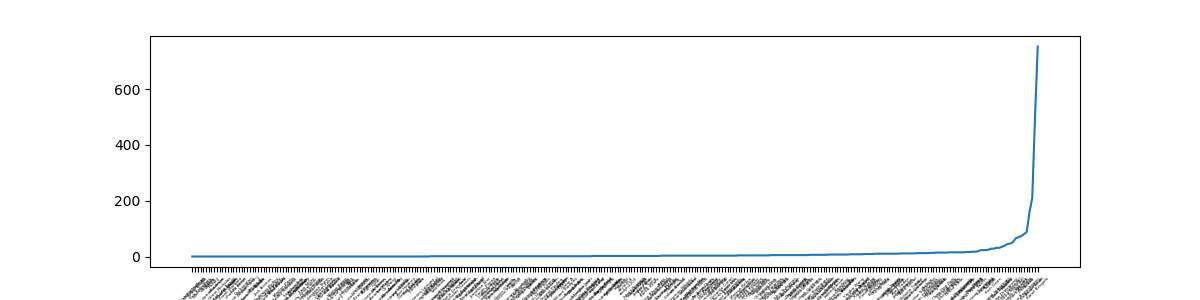

In [194]:
%matplotlib notebook
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 3))
plt.xticks(rotation=45)
plt.xticks(size=3)
plt.plot(owner_freq_df.main_dev, owner_freq_df.owns_no_artifacts)

Now, we can -similar to 
<a href="https://ieeexplore.ieee.org/stamp)/stamp.jsp?arnumber=7503718">G. Avelino et al. *A novel approach for estimating Truck Factors*</a>- start "removing" low-contributing authors from the dataset as long as still more than half of the files have an owner. The amount of remaining owners is the bus-factor of that project.

In [195]:
no_artifacts = len(owner_df.artifact)
half_no_artifacts = no_artifacts // 2
count = 0

for owner, freq in owner_freq_df.values:
    no_artifacts -= freq
    if no_artifacts < half_no_artifacts:
        break
    else:
        count += 1

busfactor = len(owner_freq_df.main_dev) - count
print(f"The bus factor of Apache Airflow is: {busfactor}")

The bus factor of Apache Airflow is: 7


----------------------------------------------------------------


# Your turn!

![](http://giphygifs.s3.amazonaws.com/media/11M1k4fIwVqPF6/giphy.gif)

Chose one or more software systems that are under version control with Git.

Use the version history as done during class (if you want to in combination with the provided Python scripts) to analyze VCS history according to one of the small projects below.

Base your analysis on the file `<your_system>_evo.log.csv` that you can create similar to the examples above like:

```bash
git clone <url to>/<your_system>.git

cd <your_system>/
git log --pretty=format:'"%h","%an","%ad"' \
    --date=short \
    --numstat > \
    ../data/<your_system>_evo.log

python evo_log_to_csv.py data/<your_system>_evo.log
python repair_git_move.py data/<your_system>_evo.log.csv
```

You can implement your analysis in the languages and with technologies of your choice. (Likely your favorite scripting language comes in handy here.)

If you do not like the shell-based analysis that relies on Git logs, you may want to consider tools, such as, [PyDriller](https://github.com/ishepard/pydriller), which provide a more high-level API for many of the actions presented in this class.



I suggest that you could work on one of the following problems:


### A) Can you suggest a team structure for a project?

Persons who work often on the same artifacts should perhaps work physically together and not be distributed around the globe, see e.g., [M. Penta et al. _The Effect of Communication Overhead on Software Maintenance Project Staffing: a Search-Based Approach_](http://crest.cs.ucl.ac.uk/fileadmin/crest/sebasepaper/DiPentaHAQ07.pdf) and N. Nagappan et al. [_The Influence of Organizational Structure on Software Quality_](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-2008-11.pdf).

Write a script/program that suggests teams of size five to ten persons.

Find a suitable categorization for all persons that rarely contribute to a project.

Chapters 11-13 in A. Tornhill _Your Code as a Crime Scene_ will likely form a good basis for the task.


### B) Hotspot Analysis

Based on A. Tornhill _Your Code as a Crime Scene_ chapters 3-5, write a script/program that identifies and visualizes hotspots (often changing and complex artifacts)

You can make use of `cloc` (installed into this VM) to compute the size (proxy for complexity) of a file:

```bash
./cloc --csv --by-file airflow
```

Alternatively, you can write another small script that computes the whitespace complexity of a file, as in chapter 6


### C) Architectural Decay

Investigate potential architectural decay based on measures for temporal coupling chapters 7-8 (and 9-10) in A. Tornhill _Your Code as a Crime Scene_.

Write a script/program that suggests artifacts that seem to be prone to architectural decay when their temporal couples increase drastically over an analysis period.


### D) Reproduce Paper Results

Take the initial paper from https://peerj.com/preprints/1233.pdf and the final version <a href="https://ieeexplore.ieee.org/stamp)/stamp.jsp?arnumber=7503718">G. Avelino et al. _A novel approach for estimating Truck Factors_</a>. Download the given repositories, implement a computation of ownership as described in the papers, and finally compare how the bus-factors developed since the papers were published to now.

### E) Freestyle

Formulate a problem that you want to investigate based on the history of a VCS. An example for such a problem formulation could be:
  
  * Can we find a relation between sentiments in commit messages and complexity of the files in the commit?

Write a script/program that implements the analysis for the given problem and generates suitable result data or plots.



## Formalities

  * Chose a project now and work on it for the rest of today's session.
  * I will be there for the session on Thursday to help with practicalities.
  * Prepare a small presentation of your results and findings for next Monday. We will start the session with a small presentation per group.


# I do not have Linux on my computer...

All of the scripts and advise in this material assumes that you are working on a Linux/Unix environment. In case you are on Windows, there are many different ways of setting up such an environment. You can find a guide on setting up virtual machines with -amongst others- Ubuntu Linux here: http://itu.dk/people/ropf/blog/vagrant_install.html. I recommend that you setup such an environment as you as software engineers should be comfortable and able to work in various environments depending on the needs of your future companies/clients.

For small analysis that do not require a lot of resources, you might want to fork and adapt this repository, so that you can run your code on mybinder.